In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from os.path import join
from os import environ

In [2]:
Autoencoder = tf.keras.models.load_model('k_fold_best_model_new_architecture_test3')

In [3]:
home=environ['HOME']
folder1='GRIMech_CH4_models_RS3_15_trajectories'
folder2='Datasets'

cantera_species=pd.read_csv(join(home, folder1,folder2,'State_space_cte_pressure_T1418_st-quarter_phi_12.csv'))
cantera_species=pd.DataFrame(cantera_species)

cantera_sources=pd.read_csv(join(home,folder1,folder2,'Reaction_rates_cte_pressure_T1418_st-quarter_phi_12.csv'))
cantera_sources=pd.DataFrame(cantera_sources)

maximum_values=pd.read_csv(join(home,folder1,folder2,'maximum_values_T1418.csv'))
maximum_values=pd.DataFrame(maximum_values)

In [4]:
def hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values):
    cantera_sources=cantera_sources.add_suffix('w')
    cantera_sources=cantera_sources.iloc[:,1:] #for taking out the timestep as data 
    
    cantera_time=cantera_species.iloc[:,1]
    cantera_temperature=cantera_species.iloc[:,2]
    cantera_pressure=cantera_species.iloc[:,3]
    
    cantera_species_fractions=cantera_species.iloc[:,4:]
    print(np.shape(cantera_species_fractions))
    
    cantera_species_fractions=cantera_species_fractions.loc[:,(cantera_species!=0).any(axis=0)]
    cantera_species_fractions=cantera_species_fractions.loc[:, (cantera_species != cantera_species.iloc[0]).any()]
    print(np.shape(cantera_species_fractions))
    
    n_columns_mass_fraction=np.shape(cantera_species_fractions)[1]
    print(n_columns_mass_fraction)
    
    cantera_sources=cantera_sources.loc[:,(cantera_sources!=0).any(axis=0)]
    cantera_sources=cantera_sources.loc[:, (cantera_sources != cantera_sources.iloc[0]).any()]
    
    print(np.shape(cantera_sources))
    n_columns_source=np.shape(cantera_sources)[1]
    print(n_columns_source)
    
    cantera_data=pd.concat([cantera_time, cantera_temperature,cantera_species_fractions,cantera_sources],axis=1)

    maximum_values=maximum_values.iloc[:,1:]
    maximum_values=pd.concat([maximum_values.iloc[:,0:2],maximum_values.iloc[:,3:]],axis=1)
    #print(maximum_values)
    
    maximum_values=maximum_values.to_numpy()
    #print(np.shape(maximum_values))
    
    iterations=np.shape(cantera_data)[1]
    
    #cantera_data.divide(maximum_values)
    for j in range(iterations):
        cantera_data.iloc[:,j]=cantera_data.iloc[:,j]/(maximum_values[0,j])
        #print(maximum_values[0,j])
    
    cantera_data_shift=cantera_data.loc[1:,:]
    cantera_data_shift=cantera_data_shift.add_suffix('shift')
    
    cantera_data=cantera_data.reset_index()
    cantera_data_shift=cantera_data_shift.reset_index()
    
    cantera_data=cantera_data.iloc[:,1:]
    cantera_data_shift=cantera_data_shift.iloc[:,1:]

    cantera_data=cantera_data.iloc[0:(np.shape(cantera_data_shift)[0]),:]
    
    data_all=pd.concat([cantera_data, cantera_data_shift], axis=1)

    columns=data_all.columns.to_list()
    
    return data_all, n_columns_source, n_columns_mass_fraction, columns

In [5]:
dataset, n_columns_source, n_columns_mass_fraction, columns=hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values)

(120000, 49)
(120000, 30)
30
(120000, 30)
30


In [6]:
dataset

,t[s],T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,...,CH3OHwshift,C2Hwshift,C2H2wshift,C2H3wshift,C2H4wshift,C2H5wshift,C2H6wshift,HCCOwshift,CH2COwshift,HCCOHwshift
0,0.000008,0.405009,4.372534e-11,1.882916e-09,4.147484e-11,0.786674,2.327499e-11,4.086889e-13,0.000001,1.855429e-09,...,4.028375e-09,1.224116e-27,1.068583e-16,1.960927e-17,3.426936e-08,1.516657e-05,-1.065479e-03,7.679836e-27,4.808867e-27,3.113375e-28
1,0.000017,0.405009,1.688803e-10,3.568217e-09,1.552013e-10,0.786674,8.904008e-11,3.044147e-12,0.000003,7.418197e-09,...,8.776572e-09,6.259174e-27,2.432264e-16,6.024522e-17,5.229058e-08,1.566091e-05,-1.065810e-03,5.404988e-26,3.432133e-26,2.263035e-27
2,0.000025,0.405009,3.669738e-10,5.077398e-09,3.266613e-10,0.786674,1.914056e-10,9.863793e-12,0.000004,1.668562e-08,...,1.511291e-08,1.995329e-26,4.373626e-16,1.330551e-16,7.088087e-08,1.613997e-05,-1.066138e-03,2.125370e-25,1.395406e-25,9.170412e-27
3,0.000033,0.405009,6.303459e-10,6.429873e-09,5.435002e-10,0.786674,3.249104e-10,2.256572e-11,0.000005,2.965450e-08,...,2.288361e-08,4.836944e-26,6.910497e-16,2.447156e-16,9.002169e-08,1.660253e-05,-1.066462e-03,6.062676e-25,4.146796e-25,2.692934e-26
4,0.000042,0.405009,9.522322e-10,7.642821e-09,7.954930e-10,0.786674,4.846341e-10,4.257574e-11,0.000007,4.632162e-08,...,3.195020e-08,9.840906e-26,1.006012e-15,4.006117e-16,1.096932e-07,1.704770e-05,-1.066782e-03,1.411401e-24,1.008363e-24,6.448640e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.999958,0.941228,1.799687e+00,1.176679e+00,2.073126e-01,0.011796,5.060018e-01,9.791055e-01,0.006075,1.002221e-02,...,2.213023e-20,7.129882e-22,4.454359e-22,9.335463e-25,5.806916e-26,4.894529e-28,6.954322e-30,1.080066e-20,4.787089e-21,2.933571e-22
119995,0.999967,0.941228,1.799687e+00,1.176679e+00,2.073126e-01,0.011796,5.060018e-01,9.791055e-01,0.006075,1.002221e-02,...,2.218736e-20,6.548753e-22,4.538574e-22,9.273160e-25,5.719409e-26,4.820828e-28,6.227178e-30,1.011729e-20,4.663523e-21,2.430265e-22
119996,0.999975,0.941228,1.799687e+00,1.176679e+00,2.073126e-01,0.011796,5.060018e-01,9.791055e-01,0.006075,1.002221e-02,...,2.095523e-20,8.437109e-22,4.451409e-22,9.289195e-25,5.834477e-26,5.223783e-28,7.478275e-30,1.012366e-20,4.885356e-21,3.030405e-22
119997,0.999983,0.941228,1.799687e+00,1.176679e+00,2.073126e-01,0.011796,5.060018e-01,9.791055e-01,0.006075,1.002221e-02,...,2.441303e-20,7.172535e-22,4.466957e-22,9.749126e-25,5.526875e-26,5.220049e-28,6.424811e-30,1.016531e-20,4.716017e-21,2.984589e-22


In [7]:
results=Autoencoder.decoder(Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy()))).numpy()

In [8]:
interest_vector=['T[K]','CH3', 'CH4', 'H2O','O2','H2','OH','HO2','H2O2']

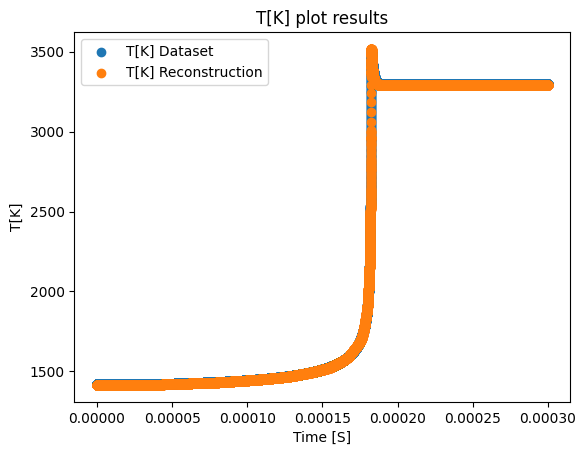

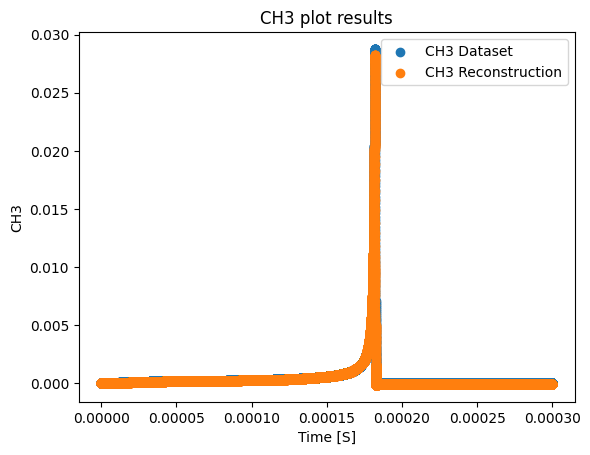

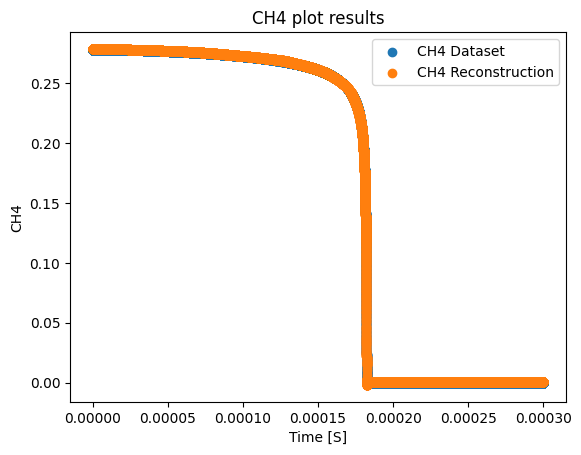

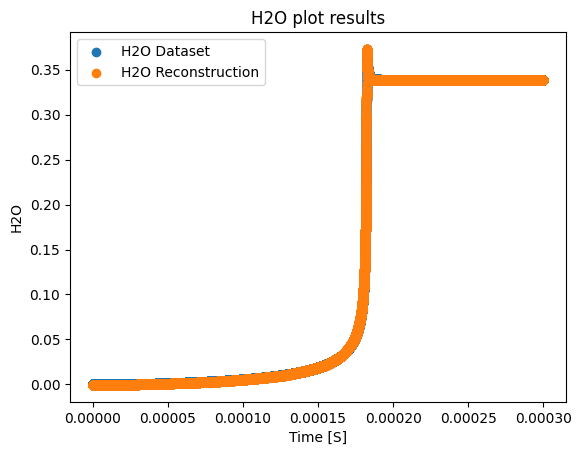

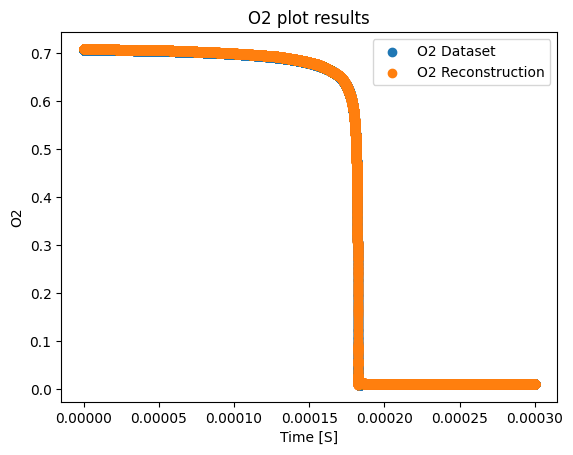

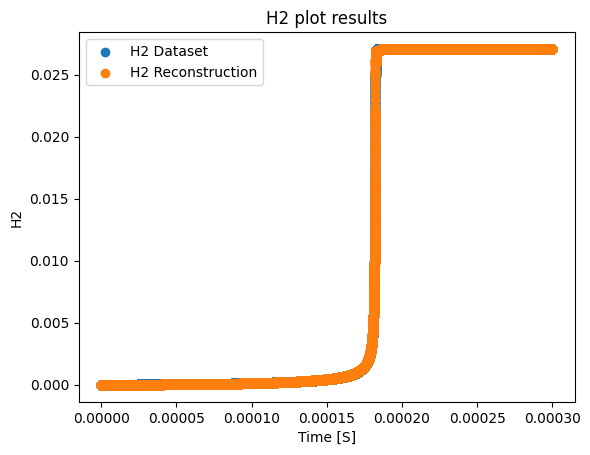

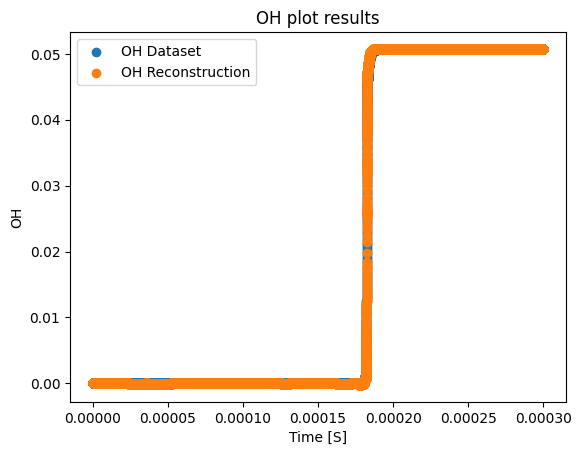

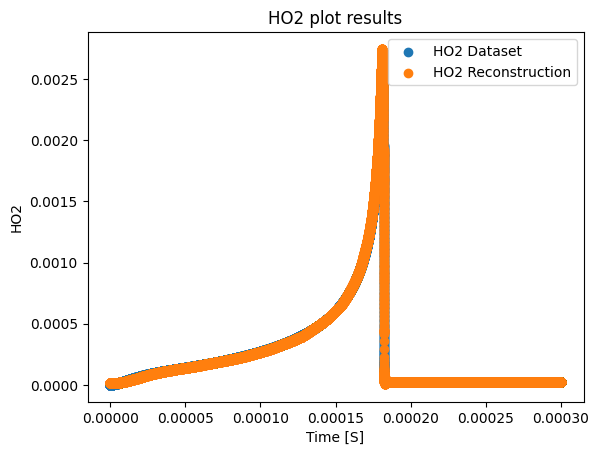

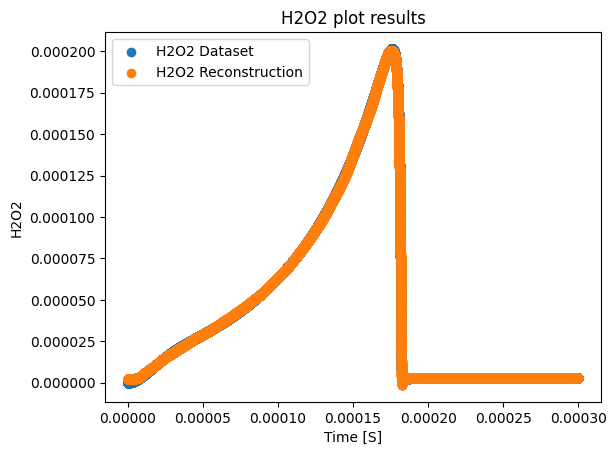

In [9]:
t_index=columns.index('t[s]shift')
t_trans=maximum_values.columns.get_loc('t[s]')
time_plot=(dataset.iloc[:,t_index])*maximum_values.iloc[0,t_trans]
    
for k in range(len(interest_vector)):
    original_index=columns.index(interest_vector[k]+'shift')
    #print(columns[original_index])
    results_index=columns.index(interest_vector[k]) #minues one due to the time column presence 
    #print(columns[results_index])
    #print(results_index-1)
    transformation_index=maximum_values.columns.get_loc(interest_vector[k])
    plot_name=interest_vector[k]+'.png'
    
    input_label=interest_vector[k]+' Dataset'
    output_label=interest_vector[k]+' Reconstruction'
    
    original=(dataset.iloc[:,original_index]).to_numpy()
    #original=original*transformation_values[1,original_index]
    #original=original+transformation_values[0,original_index]
    #original=np.exp(original)-1
    original=original*maximum_values.iloc[0,transformation_index]
    
    output=(results[:,results_index-1])
    #output=output*transformation_values[1,results_index]
    #output=output+transformation_values[0,results_index]
    #output=np.exp(output)-1
    output=output*maximum_values.iloc[0,transformation_index]
    
    plt.figure(k)
    plt.scatter(time_plot,original, label=input_label)
    plt.scatter(time_plot,output, label=output_label)
    plt.title(interest_vector[k]+' plot results')
    plt.xlabel('Time [S]')
    plt.ylabel(interest_vector[k])
    plt.legend()

In [10]:
latent_space=Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy())).numpy()

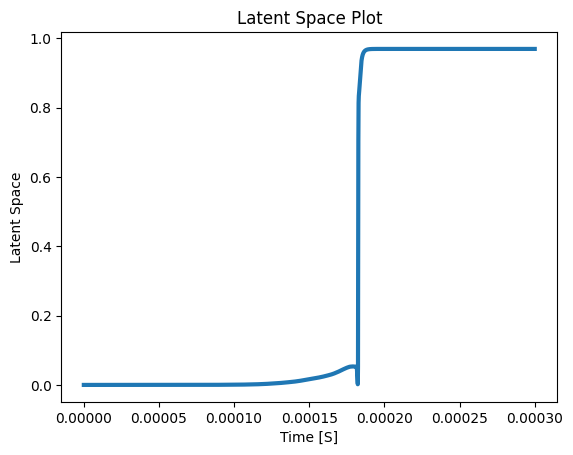

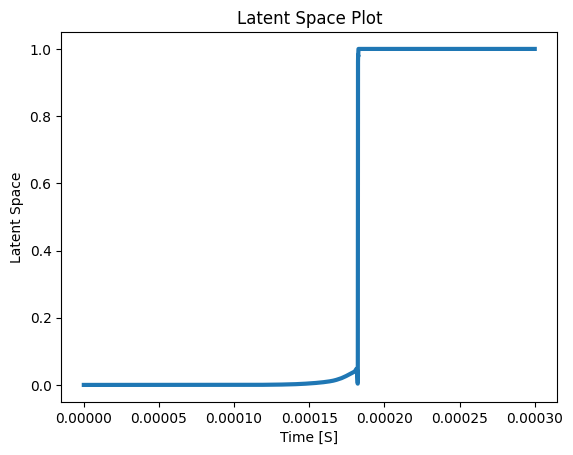

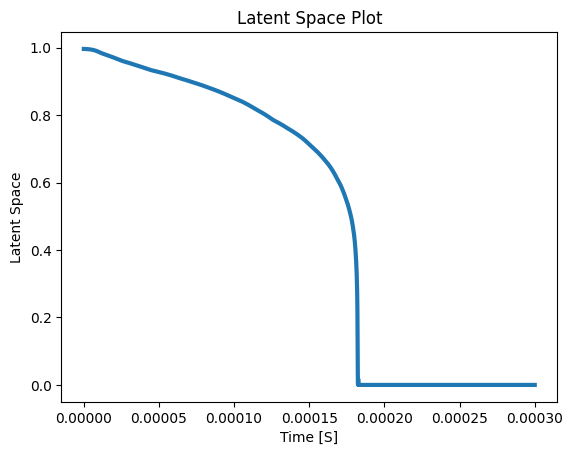

In [11]:
reduced_size=3

if reduced_size==1:
    plt.figure()
    plt.plot(time_plot,latent_space,linewidth=3)
    plt.title('Latent Space Plot')
    plt.xlabel('Time [S]')
    plt.ylabel('Latent Space')
else: 
    for i in range(reduced_size):
            plt.figure(i)
            plt.plot(time_plot,latent_space[:,i],linewidth=3)
            plt.title('Latent Space Plot')
            plt.xlabel('Time [S]')
            plt.ylabel('Latent Space')

In [12]:
corr_dataset=dataset.iloc[:,1:2+n_columns_mass_fraction+n_columns_source]
corr_columns=corr_dataset.columns.to_list()
corr_dataset

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.405009,4.372534e-11,1.882916e-09,4.147484e-11,0.786674,2.327499e-11,4.086889e-13,0.000001,1.855429e-09,7.150352e-35,...,1.040153e-09,7.390517e-29,2.641124e-17,2.909051e-18,1.683423e-08,1.465855e-05,-1.065146e-03,2.670970e-28,1.811890e-28,1.049261e-29
1,0.405009,1.688803e-10,3.568217e-09,1.552013e-10,0.786674,8.904008e-11,3.044147e-12,0.000003,7.418197e-09,3.447421e-33,...,4.028375e-09,1.224116e-27,1.068583e-16,1.960927e-17,3.426936e-08,1.516657e-05,-1.065479e-03,7.679836e-27,4.808867e-27,3.113375e-28
2,0.405009,3.669738e-10,5.077398e-09,3.266613e-10,0.786674,1.914056e-10,9.863793e-12,0.000004,1.668562e-08,2.901278e-32,...,8.776572e-09,6.259174e-27,2.432264e-16,6.024522e-17,5.229058e-08,1.566091e-05,-1.065810e-03,5.404988e-26,3.432133e-26,2.263035e-27
3,0.405009,6.303459e-10,6.429873e-09,5.435002e-10,0.786674,3.249104e-10,2.256572e-11,0.000005,2.965450e-08,1.190788e-31,...,1.511291e-08,1.995329e-26,4.373626e-16,1.330551e-16,7.088087e-08,1.613997e-05,-1.066138e-03,2.125370e-25,1.395406e-25,9.170412e-27
4,0.405009,9.522322e-10,7.642821e-09,7.954930e-10,0.786674,4.846341e-10,4.257574e-11,0.000007,4.632162e-08,3.380075e-31,...,2.288361e-08,4.836944e-26,6.910497e-16,2.447156e-16,9.002169e-08,1.660253e-05,-1.066462e-03,6.062676e-25,4.146796e-25,2.692934e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.941228,1.799687e+00,1.176679e+00,2.073126e-01,0.011796,5.060018e-01,9.791055e-01,0.006075,1.002221e-02,3.435208e-06,...,1.803476e-20,9.944961e-22,4.309104e-22,9.345393e-25,5.896663e-26,5.159741e-28,6.985929e-30,9.567826e-21,4.804272e-21,3.470777e-22
119995,0.941228,1.799687e+00,1.176679e+00,2.073126e-01,0.011796,5.060018e-01,9.791055e-01,0.006075,1.002221e-02,3.435208e-06,...,2.213023e-20,7.129882e-22,4.454359e-22,9.335463e-25,5.806916e-26,4.894529e-28,6.954322e-30,1.080066e-20,4.787089e-21,2.933571e-22
119996,0.941228,1.799687e+00,1.176679e+00,2.073126e-01,0.011796,5.060018e-01,9.791055e-01,0.006075,1.002221e-02,3.435208e-06,...,2.218736e-20,6.548753e-22,4.538574e-22,9.273160e-25,5.719409e-26,4.820828e-28,6.227178e-30,1.011729e-20,4.663523e-21,2.430265e-22
119997,0.941228,1.799687e+00,1.176679e+00,2.073126e-01,0.011796,5.060018e-01,9.791055e-01,0.006075,1.002221e-02,3.435208e-06,...,2.095523e-20,8.437109e-22,4.451409e-22,9.289195e-25,5.834477e-26,5.223783e-28,7.478275e-30,1.012366e-20,4.885356e-21,3.030405e-22


In [13]:
iterations=np.shape(corr_dataset)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes=np.zeros(iterations) #rows, columns
    corr_indexes=np.array([corr_indexes])
    
    for j in range(iterations):
        corr_indexes[:,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space)
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)
else: 
    
    corr_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes[k,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space[:,k])
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)

In [14]:
corr_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.830642,0.844909,0.947062,0.947054,-0.836440,0.947053,0.834189,-0.127412,-0.022221,0.828215,...,-0.062353,-0.057395,-0.057850,-0.057724,-0.058745,-0.170625,0.035087,-0.057592,-0.057676,-0.058043
1,0.903146,0.917808,0.923749,0.923741,-0.909097,0.923740,0.906787,-0.080718,-0.073380,0.900655,...,-0.114560,-0.107329,-0.108271,-0.108264,-0.110472,-0.222845,-0.012741,-0.107737,-0.108028,-0.107844
2,-0.829801,-0.844057,-0.949292,-0.949285,0.835594,-0.949284,-0.833346,0.128402,0.022065,-0.827379,...,0.062137,0.054409,0.055436,0.055564,0.058174,0.169097,-0.035445,0.054808,0.055138,0.055299


H      0.947062
CO2    0.947061
O      0.947054
OH     0.947053
H2     0.844909
Name: 0, dtype: float64
H      0.923749
CO2    0.923748
O      0.923741
OH     0.923740
H2     0.917808
Name: 1, dtype: float64
CH4      0.949280
O2       0.835594
C2H6     0.330404
H2O2w    0.278066
CH3w     0.242926
Name: 2, dtype: float64


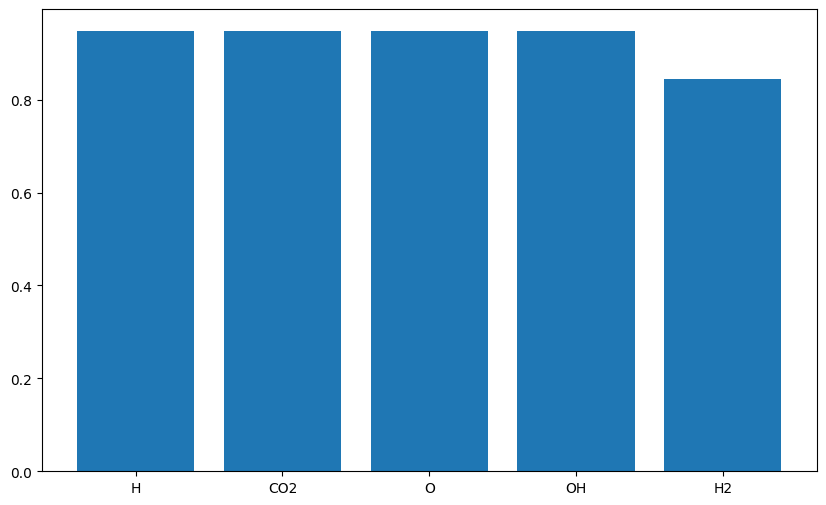

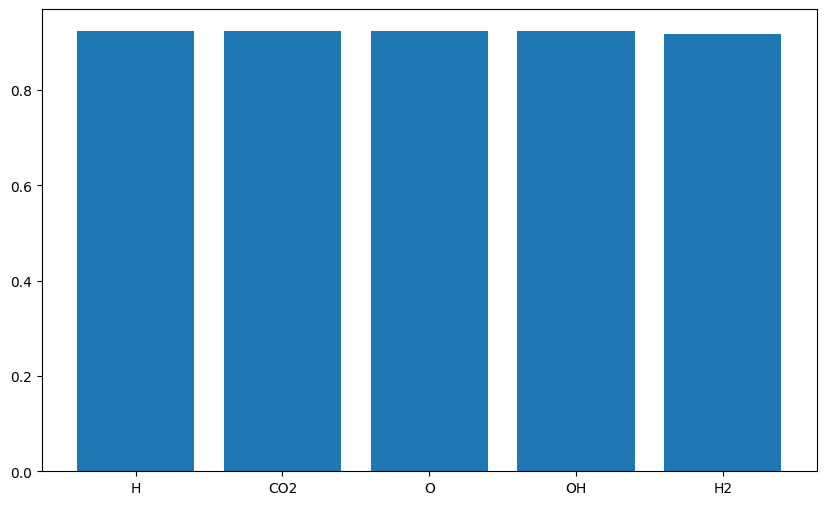

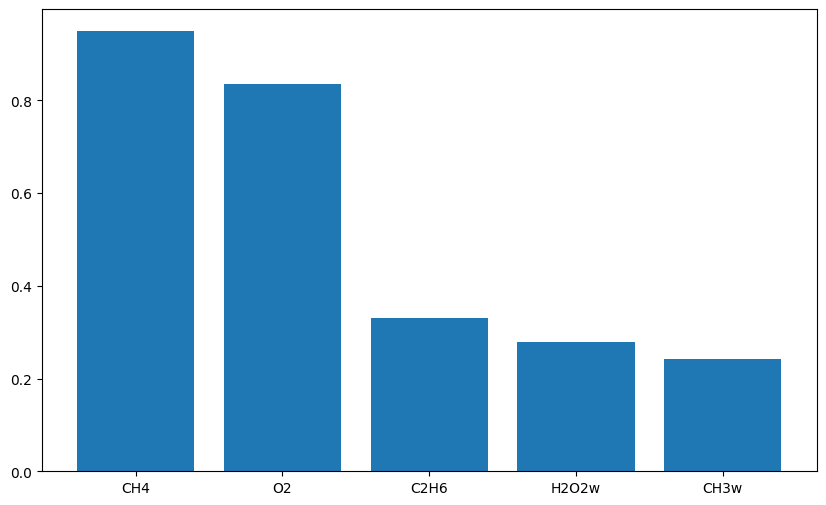

In [15]:
for m in range(reduced_size):
    
    indexes=corr_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [16]:
if reduced_size==1:
    spearman_indexes=np.zeros(iterations) #rows, columns
    spearman_indexes=np.array([spearman_indexes])
    
    for j in range(iterations):
        spearman_indexes[:,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space)
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)
else: 
    
    spearman_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            spearman_indexes[k,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space[:,k])
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)

In [17]:
spearman_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.925644,0.931380,0.983752,0.983752,-0.926896,0.983752,0.925460,-0.429534,-0.376414,0.920824,...,-0.475091,-0.467903,-0.469223,-0.469041,-0.470532,-0.509174,-0.131383,-0.468433,-0.468737,-0.468823
1,0.962311,0.968136,0.971656,0.971656,-0.963570,0.971656,0.962284,-0.410254,-0.406932,0.958421,...,-0.508478,-0.498572,-0.500522,-0.500512,-0.503500,-0.540817,-0.157960,-0.499376,-0.499960,-0.499596
2,-0.924834,-0.930560,-0.984343,-0.984343,0.926078,-0.984343,-0.924808,0.430138,0.377003,-0.921369,...,0.477652,0.466913,0.469054,0.469240,0.472816,0.510393,0.131798,0.467732,0.468389,0.468182


H      0.983752
CO2    0.983752
O      0.983752
OH     0.983752
H2     0.931380
Name: 0, dtype: float64
H      0.971656
CO2    0.971656
O      0.971656
OH     0.971656
H2     0.968136
Name: 1, dtype: float64
CH4      0.984343
O2       0.926078
C2H6     0.613075
H2O2w    0.580639
CH3w     0.563298
Name: 2, dtype: float64


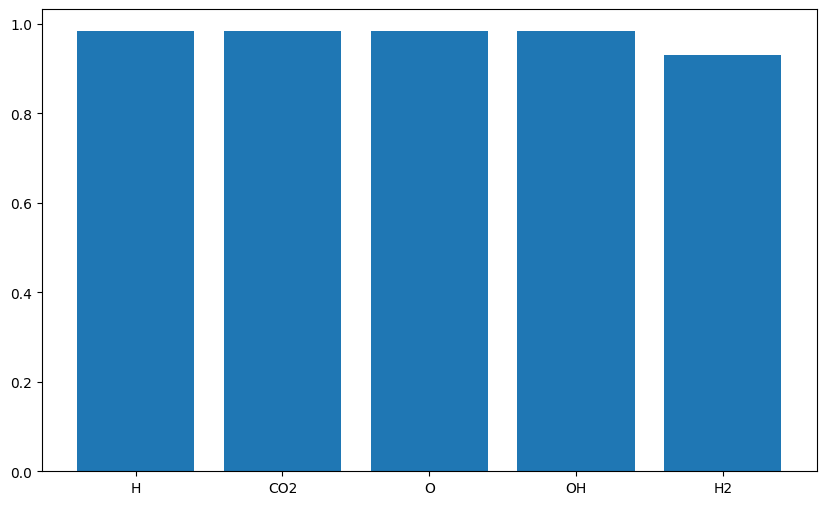

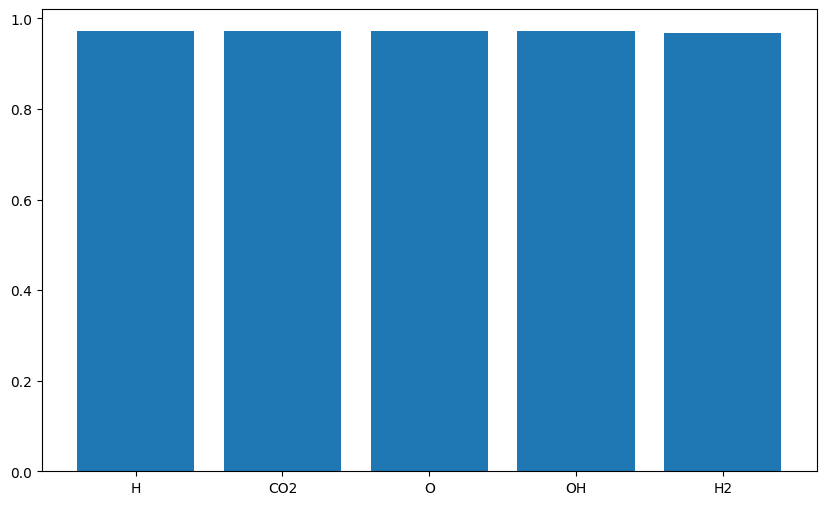

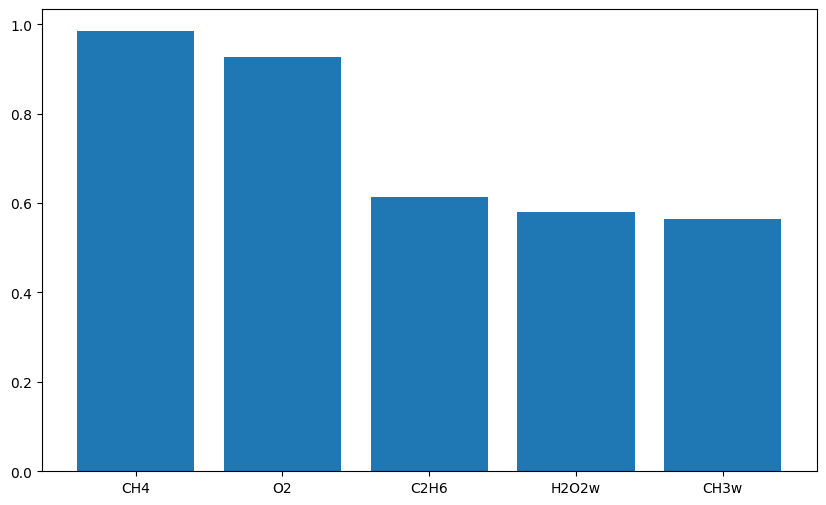

In [18]:
for m in range(reduced_size):
    
    indexes=spearman_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [19]:
n_samples=np.shape(latent_space)[0]

corr_dataset_=corr_dataset.iloc[1:,:]

latent_space_=latent_space[0:n_samples-1,:]

In [20]:
print(np.shape(corr_dataset_))
print(np.shape(latent_space_))

(119998, 61)
(119998, 3)


In [21]:
iterations=np.shape(corr_dataset_)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes_=np.zeros(iterations) #rows, columns
    corr_indexes_=np.array([corr_indexes_])
    
    for j in range(iterations):
        corr_indexes_[:,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_)
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)
else: 
    
    corr_indexes_=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes_[k,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_[:,k])
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)

In [22]:
corr_indexes_

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.439685,0.325912,0.331013,0.332159,-0.435740,0.340156,0.427348,-0.097855,-0.552732,0.421356,...,-0.803135,-0.819576,-0.821562,-0.821375,-0.809725,-0.817411,-0.023271,-0.816463,-0.816487,-0.822431
1,0.438379,0.331035,0.336147,0.337294,-0.434426,0.345308,0.426017,-0.100252,-0.550796,0.420013,...,-0.802567,-0.817388,-0.820361,-0.819797,-0.809169,-0.816789,-0.021085,-0.814292,-0.814196,-0.820397
2,-0.812923,-0.712865,-0.707985,-0.709070,0.816849,-0.716948,-0.809188,-0.303942,0.153867,-0.814571,...,0.420107,0.415966,0.418596,0.417434,0.425325,0.422964,0.027157,0.411000,0.410673,0.417230


O2w     0.816829
CH4w    0.730265
T[K]    0.439685
CO2     0.435725
H2O     0.427348
Name: 0, dtype: float64
O2w     0.814024
CH4w    0.733944
T[K]    0.438379
CO2     0.434411
H2O     0.426017
Name: 1, dtype: float64
O2      0.816849
CH4     0.708722
CH3w    0.503453
C2H6    0.479757
HO2w    0.427608
Name: 2, dtype: float64


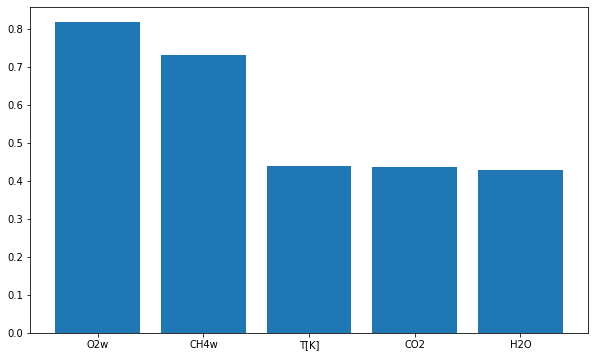

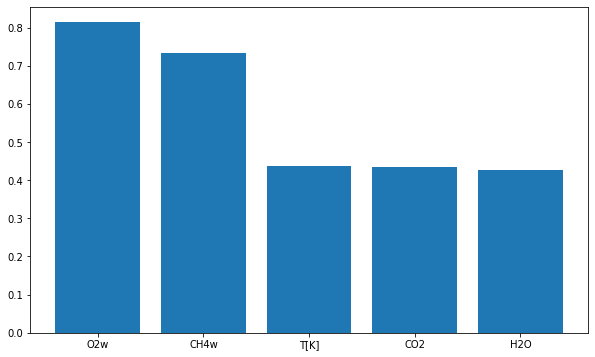

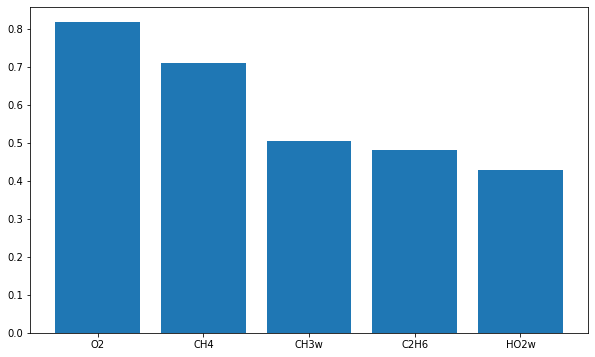

In [23]:
for m in range(reduced_size):
    
    indexes=corr_indexes_.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)